In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
file_path = '/content/Expanded_Crop_Recommendation.csv' #load datset from file
data = pd.read_csv(file_path)
# Features and target variables:
X = data.drop('Crop', axis=1)  # Features (all columns except 'Crop')
y = data['Crop']               # Target (crop label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Splitting  the dataset into training and testing sets
clf = RandomForestClassifier(n_estimators=1000, random_state=42)# Initialize the Random Forest Classifier
# Training the model
clf.fit(X_train, y_train)
# Prediction on the test set
y_pred = clf.predict(X_test)
# Evaluation on the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9886039886039886
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        24
      Banana       1.00      1.00      1.00        30
   Blackgram       1.00      1.00      1.00        24
    ChickPea       1.00      1.00      1.00        42
     Coconut       1.00      1.00      1.00        24
      Coffee       1.00      1.00      1.00        33
      Cotton       1.00      1.00      1.00        36
      Grapes       1.00      1.00      1.00        23
        Jute       0.77      1.00      0.87        24
 KidneyBeans       1.00      1.00      1.00        26
      Lentil       1.00      0.96      0.98        28
       Maize       1.00      1.00      1.00        27
       Mango       1.00      1.00      1.00        32
   MothBeans       0.97      1.00      0.98        32
    MungBean       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      

In [ ]:
import joblib

# Save the trained model
joblib.dump(clf, "/content/crop_recommendation_model.joblib")

print("Model saved successfully as joblib file!")


Model saved successfully as joblib file!


In [ ]:
from google.colab import files
files.download("/content/crop_recommendation_model.joblib")  # Change to .pkl if needed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load joblib model
clf_loaded = joblib.load("/content/crop_recommendation_model.joblib")
y_pred = clf_loaded.predict(X_test)
print(f"Reloaded Model Accuracy: {accuracy_score(y_test, y_pred)}")


Reloaded Model Accuracy: 0.9886039886039886


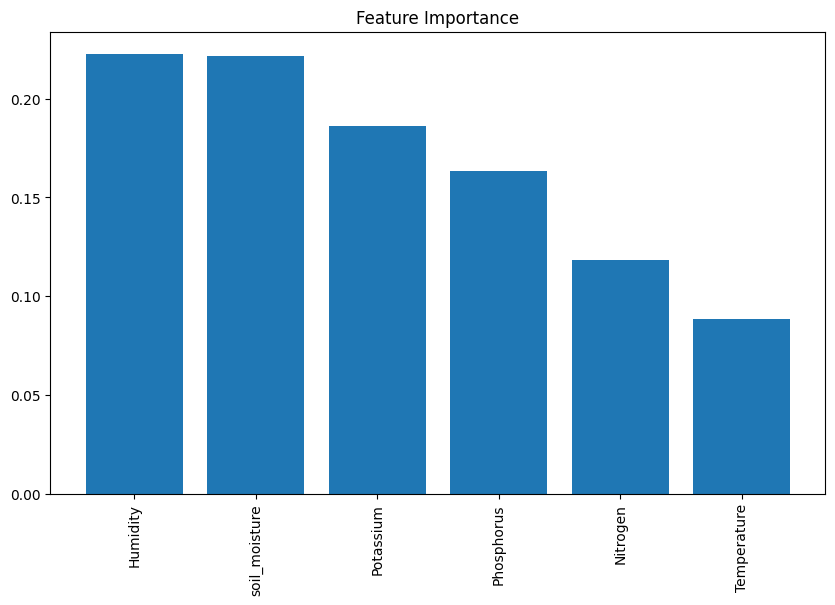

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

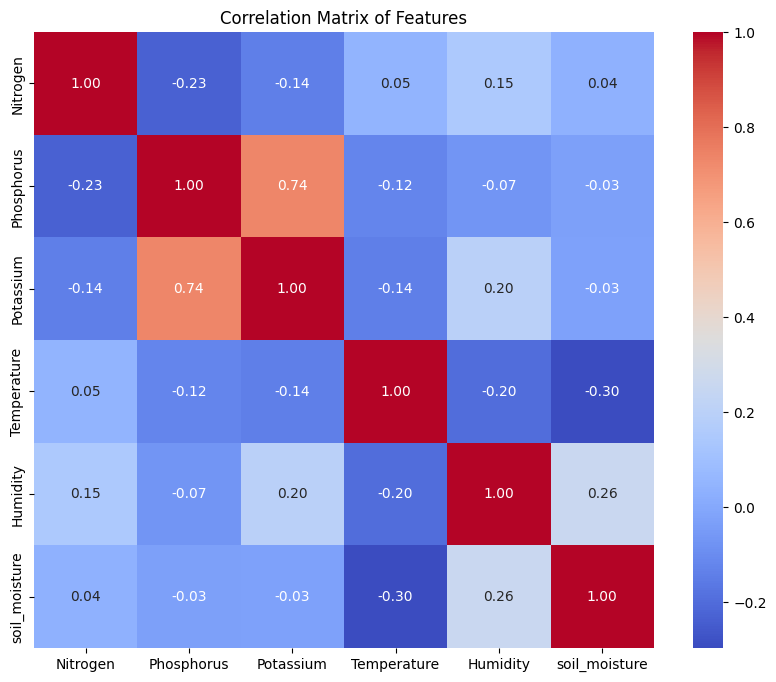

In [ ]:
import seaborn as sns
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

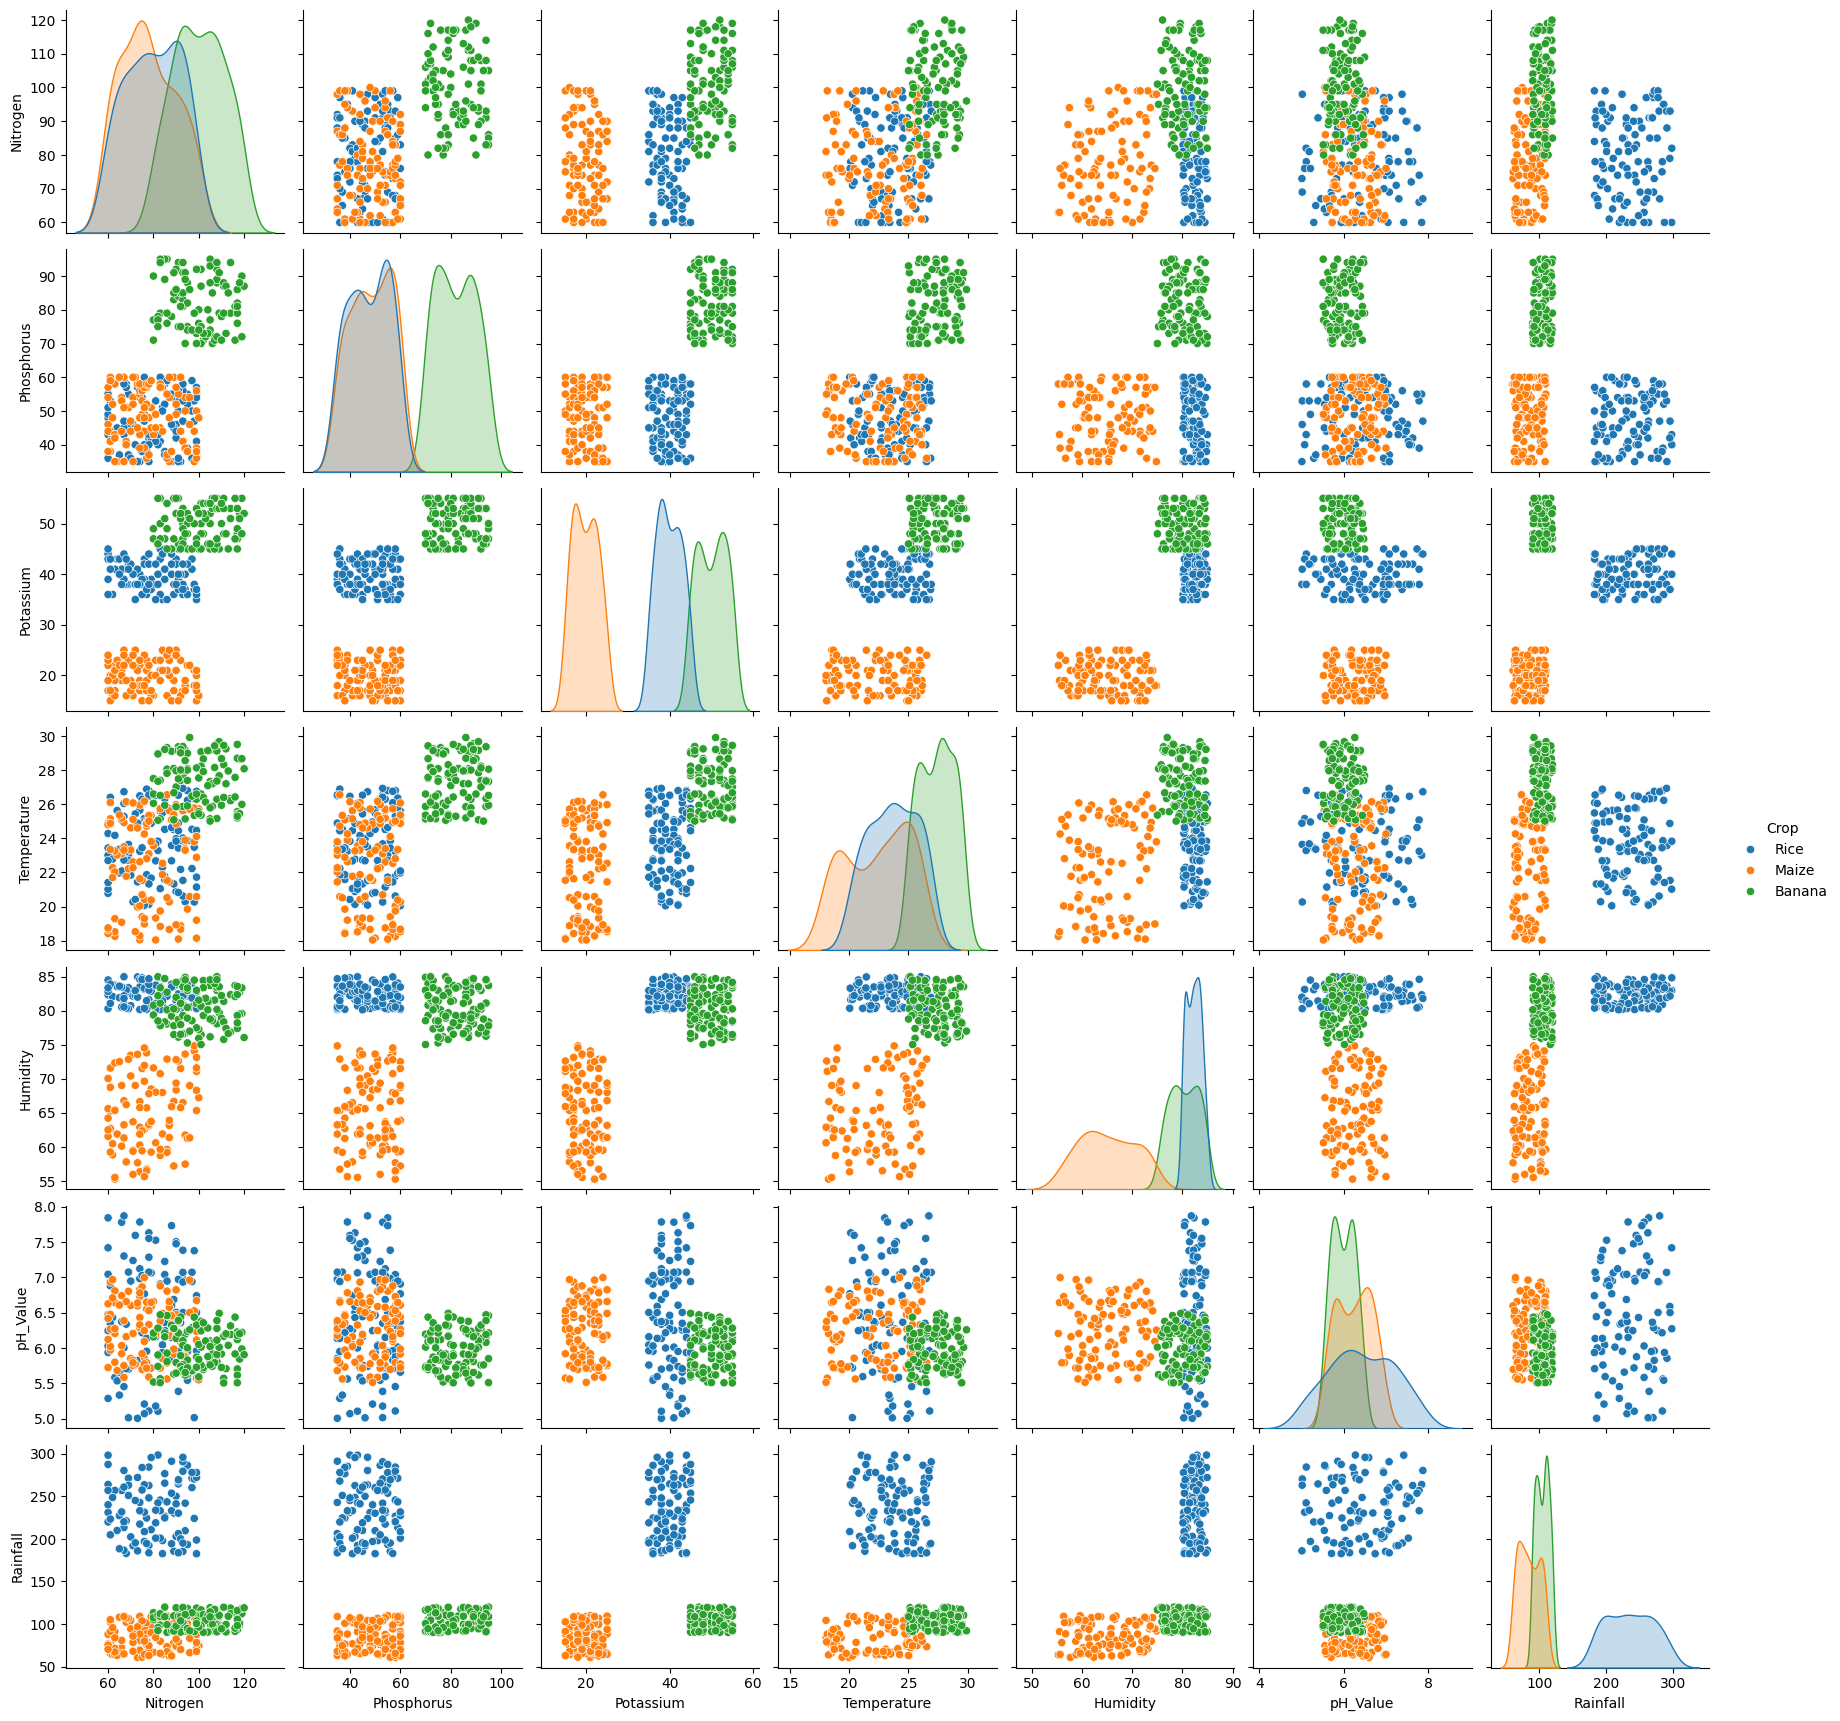

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Filter for the desired crops
data_filtered = data[data['Crop'].isin(['Banana', 'Maize', 'Rice'])]

# Create the pair plot
sns.pairplot(data_filtered, hue='Crop', diag_kind='kde')

# Show the plot
plt.show()

In [ ]:
#Manual input section
feature_names = X.columns
input_features = []
print("Enter the values for the following features:")

for feature in feature_names:
    value = float(input(f"{feature}: "))
    input_features.append(value)

input_data = pd.DataFrame([input_features], columns=feature_names)
predicted_crop = clf.predict(input_data)
print(f"The recommended crop based on the input values is: {predicted_crop[0]}")

Enter the values for the following features:
Nitrogen: 45
Phosphorus: 76
Potassium: 44
Temperature: 26
Humidity: 55
soil_moisture: 210
The recommended crop based on the input values is: PigeonPeas


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:03:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


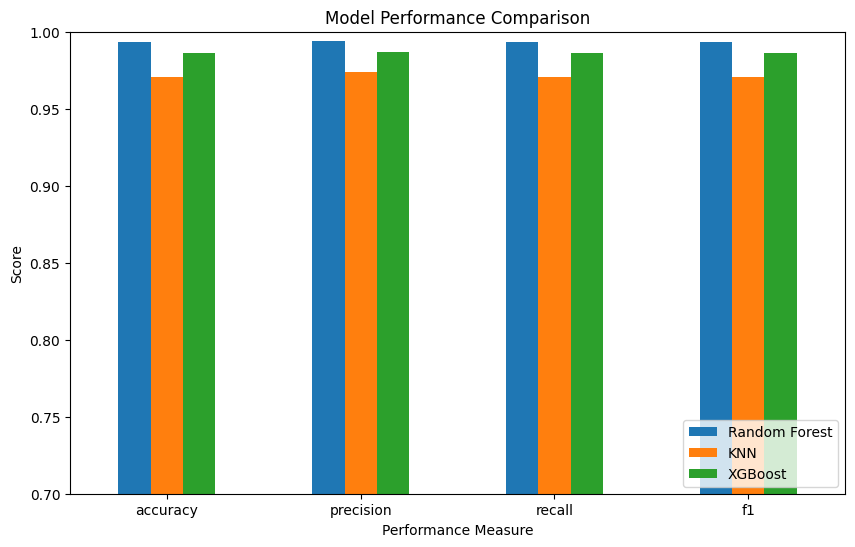

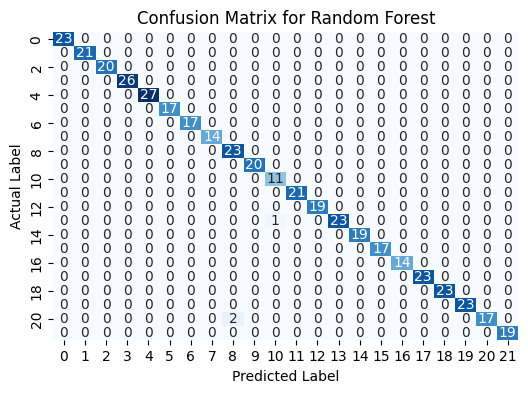

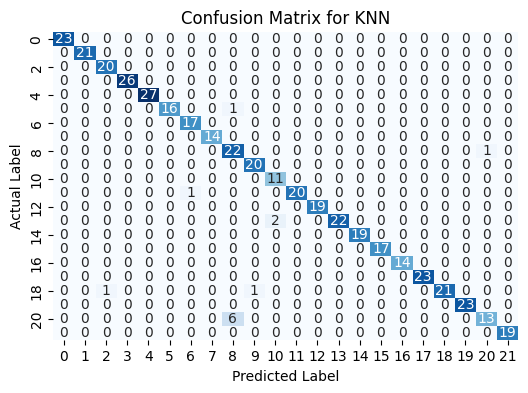

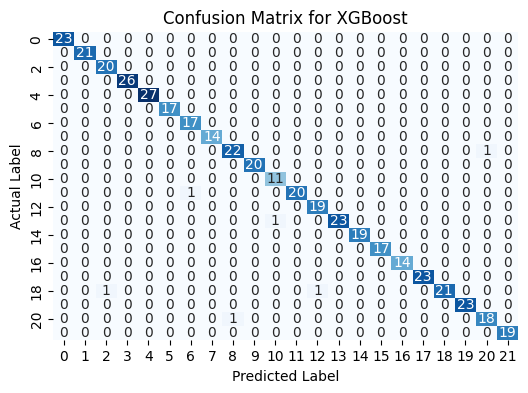

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
# Assuming the dataset has the necessary features and a target column 'Crop'

file_path = '/content/crop recc dataset.zip' #load datset from file
data = pd.read_csv(file_path)

# Preprocessing
# Label encode the target variable (crop recommendation)
label_encoder = LabelEncoder()
data['Crop'] = label_encoder.fit_transform(data['Crop'])

# Separate features and target variable
X = data.drop('Crop', axis=1)
y = data['Crop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the models
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate performance metrics for all three models
metrics = {}

# Random Forest metrics
metrics['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'f1': f1_score(y_test, y_pred_rf, average='weighted')
}

# KNN metrics
metrics['KNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'recall': recall_score(y_test, y_pred_knn, average='weighted'),
    'f1': f1_score(y_test, y_pred_knn, average='weighted')
}

# XGBoost metrics
metrics['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb, average='weighted'),
    'recall': recall_score(y_test, y_pred_xgb, average='weighted'),
    'f1': f1_score(y_test, y_pred_xgb, average='weighted')
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting Accuracy, Precision, Recall, and F1 Score for all models
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Performance Measure')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)  # Set y-axis range for better visualization
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Plotting confusion matrix heatmaps
def plot_confusion_matrix(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (assuming the dataset is already loaded)
file_path = 'datasets - irrigation schedule.csv'
dataset = pd.read_csv(file_path)

# Encode the CropType column
label_encoder = LabelEncoder()
dataset['CropType'] = label_encoder.fit_transform(dataset['CropType'])

# Define features and target
X = dataset.drop('Irrigation', axis=1)
y = dataset['Irrigation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Function to take manual input and predict irrigation ON/OFF
def predict_irrigation(crop_type, crop_days, humidity, temperature, soil_moisture):
    # Encode the crop_type
    crop_encoded = label_encoder.transform([crop_type])[0]

    # Prepare the feature vector
    input_features = pd.DataFrame([[crop_encoded, crop_days, soil_moisture, temperature, humidity]],
                                  columns=['CropType', 'CropDays', 'SoilMoisture', 'temperature', 'Humidity'])

    # Make the prediction
    prediction = rf_classifier.predict(input_features)[0]

    # Return prediction as ON/OFF
    return 'Irrigation ON' if prediction == 1 else 'Irrigation OFF'

# Example usage
user_prediction = predict_irrigation(crop_type='Wheat', crop_days=5, humidity=20, temperature=25, soil_moisture=250)
print(f'Prediction for user input: {user_prediction}')


Accuracy: 0.91
Confusion Matrix:
[[82 12]
 [ 2 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        94
           1       0.82      0.96      0.89        57

    accuracy                           0.91       151
   macro avg       0.90      0.92      0.90       151
weighted avg       0.92      0.91      0.91       151

Prediction for user input: Irrigation OFF


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = 'datasets - irrigation schedule.csv'
dataset = pd.read_csv(file_path)

# Encode the CropType column
label_encoder = LabelEncoder()
dataset['CropType'] = label_encoder.fit_transform(dataset['CropType'])

# Define features and target
X = dataset.drop('Irrigation', axis=1)
y = dataset['Irrigation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# 2. K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# 3. XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{model_name} Accuracy: {accuracy:.2f}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'{model_name} Confusion Matrix:\n{conf_matrix}')

    class_report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{class_report}')

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Function to take manual input and predict irrigation ON/OFF for Random Forest
def predict_irrigation(model, crop_type, crop_days, humidity, temperature, soil_moisture):
    # Encode the crop_type
    crop_encoded = label_encoder.transform([crop_type])[0]

    # Prepare the feature vector
    input_features = pd.DataFrame([[crop_encoded, crop_days, soil_moisture, temperature, humidity]],
                                  columns=['CropType', 'CropDays', 'SoilMoisture', 'temperature', 'Humidity'])

    # Make the prediction
    prediction = model.predict(input_features)[0]

    # Return prediction as ON/OFF
    return 'Irrigation ON' if prediction == 1 else 'Irrigation OFF'

# Example usage for Random Forest
user_prediction_rf = predict_irrigation(rf_classifier, crop_type='Wheat', crop_days=5, humidity=20, temperature=25, soil_moisture=300)
print(f'\nRandom Forest Prediction for user input: {user_prediction_rf}')

# Example usage for KNN
user_prediction_knn = predict_irrigation(knn_classifier, crop_type='Wheat', crop_days=5, humidity=20, temperature=25, soil_moisture=300)
print(f'KNN Prediction for user input: {user_prediction_knn}')

# Example usage for XGBoost
user_prediction_xgb = predict_irrigation(xgb_classifier, crop_type='Wheat', crop_days=5, humidity=20, temperature=25, soil_moisture=300)
print(f'XGBoost Prediction for user input: {user_prediction_xgb}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:35:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Accuracy: 0.91
Random Forest Confusion Matrix:
[[82 12]
 [ 2 55]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        94
           1       0.82      0.96      0.89        57

    accuracy                           0.91       151
   macro avg       0.90      0.92      0.90       151
weighted avg       0.92      0.91      0.91       151


K-Nearest Neighbors Accuracy: 0.83
K-Nearest Neighbors Confusion Matrix:
[[72 22]
 [ 3 54]]
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        94
           1       0.71      0.95      0.81        57

    accuracy                           0.83       151
   macro avg       0.84      0.86      0.83       151
weighted avg       0.87      0.83      0.84       151


XGBoost Accuracy: 0.92
XGBoost Confusion Matrix:
[[85  9]
 [ 3 54]]
XGBoost Classification 

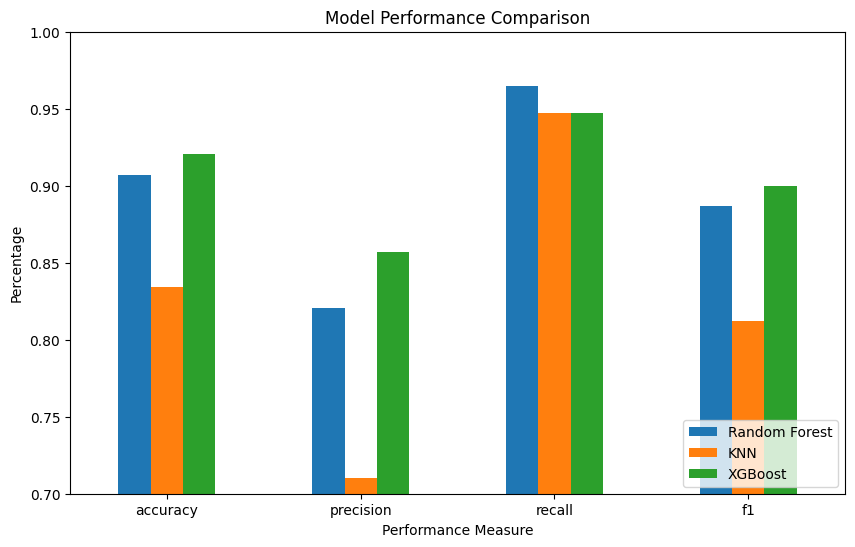

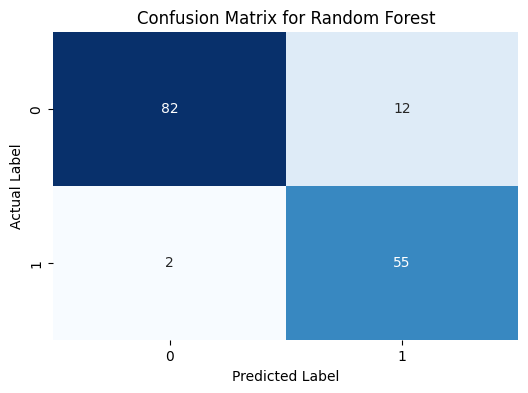

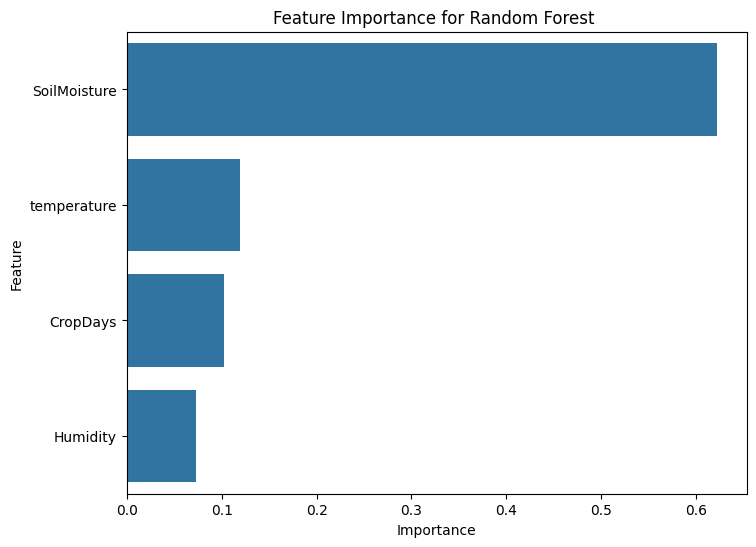

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming the models are already trained (RandomForest, KNN, XGBoost)
# Calculate performance metrics for all three models
metrics = {}

# Random Forest metrics
metrics['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf)
}

# KNN metrics
metrics['KNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn)
}

# XGBoost metrics
metrics['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb)
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting Accuracy, Precision, Recall, and F1 Score for all models
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Performance Measure')
plt.ylabel('Percentage')
plt.ylim(0.7, 1.0)  # Set y-axis range for better visualization
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Plotting confusion matrix heatmaps
def plot_confusion_matrix(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    # Exclude 'CropType' from the feature importance plot
    feature_df = feature_df[feature_df['Feature'] != 'CropType']

    # Sort the features by importance
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(f'Feature Importance')
    plt.show()

# Plot feature importance for Random Forest excluding 'CropType'
plot_feature_importance(rf_classifier, "Random Forest", X.columns)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = 'datasets - irrigation schedule.csv'
dataset = pd.read_csv(file_path)

# Encode the CropType column
label_encoder = LabelEncoder()
dataset['CropType'] = label_encoder.fit_transform(dataset['CropType'])

# Define features and target
X = dataset.drop('Irrigation', axis=1)
y = dataset['Irrigation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Threshold values for the rule-based adjustments
# These are sample threshold values. Adjust based on data and experimentation.
threshold_sandy = 200
threshold_clay = 300
threshold_flowering = 220
threshold_maturation = 180

# Hybrid function for irrigation prediction
def predict_irrigation(crop_type, crop_days, humidity, temperature, soil_moisture, soil_type, growth_stage):
    # Step 1: ML Model Prediction
    crop_encoded = label_encoder.transform([crop_type])[0]
    input_features = pd.DataFrame([[crop_encoded, crop_days, soil_moisture, temperature, humidity]],
                                  columns=['CropType', 'CropDays', 'SoilMoisture', 'temperature', 'Humidity'])
    ml_prediction = rf_classifier.predict(input_features)[0]  # ML model output (1 = ON, 0 = OFF)

    # Step 2: Rule-Based Adjustment based on Soil Type and Growth Stage
    final_decision = ml_prediction

    # Rule adjustments based on soil type
    if soil_type == "Sand" and ml_prediction == 0 and soil_moisture < 0.9 * threshold_sandy:
        final_decision = 1  # Irrigate for sandy soil if moisture is low
    elif soil_type == "Clay" and ml_prediction == 1 and soil_moisture > 1.1 * threshold_clay:
        final_decision = 0  # Skip irrigation for clay soil if moisture is sufficient

    # Rule adjustments based on growth stage
    if growth_stage == "Flowering" and ml_prediction == 0 and soil_moisture < threshold_flowering:
        final_decision = 1  # Irrigate during flowering if soil moisture is low
    elif growth_stage == "Maturation" and ml_prediction == 1 and soil_moisture > threshold_maturation:
        final_decision = 0  # Skip irrigation during maturation if soil moisture is high

    # Return final irrigation decision
    return 'Irrigation ON' if final_decision == 1 else 'Irrigation OFF'

# User input simulation for testing
def test_manual_input():
    crop_type = input("Enter Crop Type (e.g., Wheat, Corn): ")
    crop_days = int(input("Enter Days Since Planting: "))
    humidity = float(input("Enter Humidity (%): "))
    temperature = float(input("Enter Temperature (°C): "))
    soil_moisture = float(input("Enter Soil Moisture Level: "))
    soil_type = input("Enter Soil Type (Sand, Loam, Clay): ")
    growth_stage = input("Enter Growth Stage (Germination, Vegetative, Flowering, Maturation): ")

    prediction = predict_irrigation(crop_type, crop_days, humidity, temperature, soil_moisture, soil_type, growth_stage)
    print(f'Prediction for user input: {prediction}')

# Run the test
test_manual_input()


Accuracy: 0.91
Confusion Matrix:
[[82 12]
 [ 2 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        94
           1       0.82      0.96      0.89        57

    accuracy                           0.91       151
   macro avg       0.90      0.92      0.90       151
weighted avg       0.92      0.91      0.91       151



In [ ]:
import pandas as pd
import requests
from datetime import datetime
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# OpenWeatherMap API details
API_KEY = "5446c459f87771f3afbd7df357a31c71"
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# Firebase Database URL
FIREBASE_URL = "https://smart-irrigation-weather-api-default-rtdb.asia-southeast1.firebasedatabase.app/rainfall_data"

# Load the dataset
file_path = "/content/AgriData_Dist.xls"
crop_data = pd.read_excel(file_path)

# Remove unnecessary "Unnamed" columns
crop_data = crop_data.loc[:, ~crop_data.columns.str.contains('^Unnamed')]

def fetch_rainfall_data(lat, lon):
    """
    Fetches real-time rainfall data from the OpenWeatherMap API and saves it to Firebase.

    Parameters:
    - lat: Latitude of the location
    - lon: Longitude of the location

    Returns:
    - Rainfall in mm or 0 if no rain data is available
    """
    try:
        params = {
            "lat": lat,
            "lon": lon,
            "appid": API_KEY,
            "units": "metric"
        }

        # Fetch weather data
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()

        # Extract required data
        rain = data.get("rain", {}).get("1h", 0)  # Default to 0 if no rain data is available
        city_name = data.get("name", "Unknown location")
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        row_data = {"timestamp": timestamp, "city": city_name, "rainfall_mm": rain}

        # Save to Firebase
        firebase_response = requests.post(f"{FIREBASE_URL}.json", json=row_data)
        if firebase_response.status_code in [200, 201]:
            logging.info(f"Data successfully sent to Firebase: {row_data}")
        else:
            logging.error(f"Failed to send data to Firebase: {firebase_response.status_code}, {firebase_response.text}")

        return rain  # Return the rainfall data for integration into the irrigation system

    except requests.RequestException as e:
        logging.error(f"Error fetching weather data: {e}")
        return 0  # Default to 0 mm rainfall if an error occurs

def rule_based_irrigation(crop_name, growth_stage, soil_moisture, temperature, humidity, soil_type, lat, lon):
    """
    Fully rule-based irrigation decision-making module with integrated rainfall prediction.

    Parameters:
    - crop_name: Name of the crop (e.g., Tomato, Chili)
    - growth_stage: Current growth stage (e.g., Germination, Vegetative, Flowering, Harvesting)
    - soil_moisture: Current soil moisture level (%)
    - temperature: Current temperature (°C)
    - humidity: Current humidity (%)
    - soil_type: Type of soil (e.g., Sandy, Loamy, Clayey, Silt)
    - lat: Latitude of the location
    - lon: Longitude of the location

    Returns:
    - 'Irrigation ON' or 'Irrigation OFF'
    """
    # Fetch rainfall data
    rainfall_mm = fetch_rainfall_data(lat, lon)

    # Filter the dataset for the selected crop name
    crop_rules = crop_data[crop_data["CROPS"].str.contains(crop_name, case=False, na=False)]

    if crop_rules.empty:
        return f"No rules defined for {crop_name}"

    # Extract thresholds for the crop
    temp_min = crop_rules["MIN_TEMP"].values[0]
    temp_max = crop_rules["MAX_TEMP"].values[0]
    humidity_min = crop_rules["RELATIVE_HUMIDITY_MIN"].values[0]
    humidity_max = crop_rules["RELATIVE_HUMIDITY_MAX"].values[0]
    moisture_min = crop_rules["MIN_MOISTURE"].values[0]
    moisture_max = crop_rules["MAX_MOISTURE"].values[0]



    # Adjust soil moisture thresholds for growth stages
    if growth_stage == "Germination":
        moisture_min += 5
        moisture_max += 5
    elif growth_stage == "Vegetative":
        moisture_min += 3
        moisture_max += 3
    elif growth_stage == "Flowering":
        moisture_min += 5
    elif growth_stage == "Harvesting":
        moisture_min -= 5
        moisture_max -= 5

    # Soil-specific adjustments
    if soil_type == "Sandy":
        moisture_min -= 5
    elif soil_type == "Clayey":
        moisture_max += 5

    # Rule evaluation
    if rainfall_mm > 5:  # Assuming rainfall > 5 mm indicates sufficient rain
        return f"Irrigation OFF (Rainfall detected: {rainfall_mm} mm)"
    if not (moisture_min <= soil_moisture <= moisture_max):
        return f"Irrigation ON (Soil Moisture Out of Range: {soil_moisture}% not in {moisture_min}–{moisture_max}%)"
    if not (temp_min <= temperature <= temp_max):
        return f"Irrigation ON (Temperature Out of Range: {temperature}°C not in {temp_min}–{temp_max}°C)"
    if not (humidity_min <= humidity <= humidity_max):
        return f"Irrigation ON (Humidity Out of Range: {humidity}% not in {humidity_min}–{humidity_max}%)"

    return "Irrigation OFF"

# Example usage
result = rule_based_irrigation(
    crop_name="Tomato",
    growth_stage="Flowering",
    soil_moisture=50,
    temperature=28,
    humidity=75,
    soil_type="Loamy",
    lat=11.0168,  # Latitude for Coimbatore
    lon=76.9558   # Longitude for Coimbatore
)
print(result)


Irrigation ON (Soil Moisture Out of Range: 50% not in 35.0–45.0%)


In [ ]:
# Define rainfall patterns by district
district_patterns = {
    "Aruppukottai": "E4 (E4) C2 E2",
    "Paramakudi": "E4 (E4) C2 E2",
    "Muthukulathur": "E4 (E4) C2 E2",
    "Thiruvadanai": "E4 (E4) C2 E2",
    "Sathur": "E4 (E4) C2 E2",
    "Srivilliputhur": "E4 (E4) C2 E2",
    "Kovilpatti": "E4 (E4) C2 E2",
    "Vilathikulam": "E4 (E4) C2 E2",
    "Sankarankovil": "E4 (E4) C2 E2",
    "Thoothukudi": "E4 (E4) C2 E2",
    "Srivaikuntam": "E4 (E4) C2 E2",
    "Udumalpet": "E4 (E4) C2 E2",
    "Coimbatore": "E4 (E4) C2 E2",
    "Dharapuram": "E4 (E4) C2 E2",
    "Palladam": "E4 (E4) C2 E2",
    "Gobichettipalayam": "E4 (E4) C2 E2",
    "Bhavani": "E4 (E4) C2 E2",
    "Erode": "E4 (E4) C2 E2",
    "Avinashi": "E4 (E4) C2 E2",
    "Uthamapalayam": "E4 (E4) C2 E2",
    "Palani": "E4 (E4) C2 E2",
    "Kodaikanal": "E4 (E4) C2 E2",
    "Vedasandur": "E4 (E4) C2 E2",
    "Dindugul": "E4 (E4) C2 E2",
    "Nilakottai": "E4 (E4) C2 E2",
    "Usilampatti": "E4 (E4) C2 E2",
    "Thirumangalam": "E4 (E4) C2 E2",
    "Periakulam": "E4 (E4) C2 E2",
    "Karur": "E4 (E4) C2 E2",
    "Tiruchendur": "E4 (E4) B1 C2 E1",
    "Nanguneri": "E4 (E4) B1 C2 E1",
    "Tirunelveli": "E4 (E4) B1 C2 E1",
    "Ambasamudram": "E4 (E4) B1 C2 E1",
    "Ramanathapuram": "E4 (E4) B1 C2 E1",
    "Nagapattinam": "E4 (E4) A1 B2 E1",
    "Thiruthuraipoondi": "E4 (E4) A1 B2 E1",
    "Lalgudi": "E4 (E4) A1 B2 E1",
    "Musiri": "E4 (E4) A1 B2 E1",
    "Thuraiyur": "E4 (C1 E3) C2 E2",
    "Kulithalai": "E4 (C1 E3) C2 E2",
    "Tiruchirappalli": "E4 (C1 E3) C2 E2",
    "Manapparai": "E4 (C1 E3) C2 E2",
    "Pollachi": "E4 (C1 E3) C2 E2",
    "Agastheswaram": "E4 (C1 E3) C2 E2",
    "Mayavaram": "E4 (C1 E3) A1 B1 C1 E1",
    "Nannilam": "E4 (C1 E3) A1 B1 C1 E1",
    "Vaniyambadi": "E4 (C2 E2) C1 E3",
    "Thirupathur": "E4 (C2 E2) C1 E3",
    "Uthankarai": "E4 (C2 E2) C1 E3",
    "Thirukoilur": "E4 (C2 E2) C1 E3",
    "Kallakurichi": "E4 (C2 E2) C1 E3",
    "Perambalur": "E4 (C2 E2) C1 E3",
    "Kulathur": "E4 (C2 E2) C1 E3",
    "Alangudi": "E4 (C2 E2) C1 E3",
    "Thirumayam": "E4 (C2 E2) C1 E3",
    "Harur": "E4 (C2 E2) C1 E3",
    "Athur": "E4 (C2 E2) C1 E3",
    "Thanjavur": "E4 (C2 E2) C1 E3",
    "Aranthangi": "E4 (C2 E2) C1 E3",
    "Arakkonam": "E4 (C2 E2) C1 E3",
    "Walajapet": "E4 (C2 E2) C1 E3",
    "Cheyyar": "E4 (C2 E2) C1 E3",
    "Arani": "E4 (C2 E2) C1 E3",
    "Polur": "E4 (C2 E2) C1 E3",
    "Chengam": "E4 (C2 E2) C1 E3",
    "Thiruvannamalai": "E4 (C2 E2) C1 E3",
    "Gudiyatham": "E4 (C2 E2) C1 E3",
    "Vellore": "E4 (C2 E2) C1 E3",
    "Thiruthani": "E4 (C2 E2) C1 E3",
    "Madurai North": "E4 (C2 E2) C1 E3",
    "Madurai South": "E4 (C2 E2) C1 E3",
    "Melur": "E4 (C2 E2) C1 E3",
    "Sivaganga": "E4 (C2 E2) C1 E3",
    "Wandavasi": "E4 (C2 E2) C1 E3",
    "Virudhachalam": "E4 (C2 E2) B1 C2 E1",
    "Ariyalur": "E4 (C2 E2) B1 C2 E1",
    "Udayarpalayam": "E4 (C2 E2) B1 C2 E1",
    "Kumbakonam": "E4 (C2 E2) B1 C2 E1",
    "Papanasam": "E4 (C2 E2) B1 C2 E1",
    "Mannargudi": "E4 (C2 E2) B1 C2 E1",
    "Pattukottai": "E4 (C2 E2) B1 C2 E1",
    "Orathanadu": "E4 (C2 E2) B1 C2 E1",
    "Tenkasi": "E4 (C2 E2) B1 C2 E1",
    "Shencottai": "E4 (C2 E2) B1 C2 E1",
    "Thiruvallur": "E4 (C2 E2) B1 C2 E1",
    "Sriperumpudur": "E4 (C2 E2) B1 C2 E1",
    "Kanchipuram": "E4 (C2 E2) B1 C2 E1",
    "Chengalpattu": "E4 (C2 E2) B1 C2 E1",
    "Maduranthagam": "E4 (C2 E2) B1 C2 E1",
    "Tindivanam": "E4 (C2 E2) B1 C2 E1",
    "Villupuram": "E4 (C2 E2) B1 C2 E1",
    "Ponneri": "E4 (C2 E2) A1 B1 C1 E1",
    "Saidapet": "E4 (C2 E2) A1 B1 C1 E1",
    "Chidambaram": "E4 (C2 E2) A1 B1 C1 E1",
    "Sirkazhi": "E4 (C2 E2) A1 B1 C1 E1",
    "Hosur": "C1 E3 (C1 E3) C1 E3",
    "Denkanikottai": "C1 E3 (C1 E3) C1 E3"
}

# Rainfall levels (in cm)
rainfall_values = {
    "A": 30,  # Very high
    "B": 25,  # High
    "C": 15,  # Moderate
    "D": 7.5, # Low
    "E": 2.5  # Very low
}

# Season names and corresponding months
season_months = {
    "pre-monsoon": ["February", "March", "April", "May"],
    "monsoon": ["June", "July", "August", "September"],
    "post-monsoon": ["October", "November", "December", "January"]
}

def parse_pattern(pattern):
    """Parse and split pattern into seasonal rainfall data for pre-monsoon, monsoon, and post-monsoon."""
    try:
        pre_monsoon_pattern = pattern.split("(")[0].strip()
        monsoon_pattern = pattern.split("(")[1].split(")")[0].strip()
        post_monsoon_pattern = pattern.split(")")[-1].strip()
    except IndexError:
        print(f"Error: Pattern '{pattern}' is malformed.")
        return [], [], []

    return (expand_pattern(pre_monsoon_pattern), expand_pattern(monsoon_pattern), expand_pattern(post_monsoon_pattern))

def expand_pattern(pattern_section):
    """Converts a condensed pattern like 'E4 C2 E2' into a list of rainfall values based on months."""
    expanded = []
    # Split the section by spaces to handle multiple patterns like 'C2 E2'
    parts = pattern_section.split()
    for part in parts:
        try:
            level = part[0]
            months = int(part[1])
            expanded.extend([rainfall_values[level]] * months)
        except (IndexError, ValueError, KeyError):
            print(f"Error: Pattern section '{pattern_section}' is invalid.")
            return []
    return expanded

def determine_season(month):
    """Determines the season based on the input month."""
    for season, months in season_months.items():
        if month in months:
            return season
    return None

def get_forecast(season):
    """Provides a forecast message based on the season."""
    forecasts = {
        "pre-monsoon": "Dry season with occasional light showers.",
        "monsoon": "Expect frequent heavy rainfall.",
        "post-monsoon": "Moderate rainfall likely."
    }
    return forecasts.get(season, "Unknown season.")

def main():
    # Input: Current month and district
    month = input("Enter the current month (e.g., January): ").strip().capitalize()
    district = input("Enter the district name: ").strip().capitalize()

    # Check if the district exists in the database
    if district in district_patterns:
        pattern = district_patterns[district]
        pre_monsoon, monsoon, post_monsoon = parse_pattern(pattern)

        # Get the current season and select the relevant rainfall data
        season = determine_season(month)
        if season == "pre-monsoon":
            rainfall_data = pre_monsoon
        elif season == "monsoon":
            rainfall_data = monsoon
        elif season == "post-monsoon":
            rainfall_data = post_monsoon
        else:
            print("Invalid month.")
            return

        # Calculate and display the average rainfall for the selected season
        if rainfall_data:
            avg_rainfall = sum(rainfall_data) / len(rainfall_data)
            print(f"\nAverage Rainfall for {district} in {month}: {avg_rainfall:.2f} cm")
        else:
            print("No rainfall data available for this season.")

        # Display the rainfall forecast for the current season
        print(f"Rainfall Forecast for {month}: {get_forecast(season)}")
    else:
        print("District not found in the database.")

# Run the program
if __name__ == "__main__":
    main()


Enter the current month (e.g., January): september
Enter the district name: tenkasi

Average Rainfall for Tenkasi in September: 8.75 cm
Rainfall Forecast for September: Expect frequent heavy rainfall.


In [ ]:
def classify_chemical_constraint(pH, N, P, K):
    if pH > 7.5:
        if N < 10 or P < 5 or K < 50:
            return "Saline Soil (Chemical Constraint)"
        else:
            return "Sodic Soil (Chemical Constraint)"
    elif pH < 6.0:
        if N < 10 or P < 5 or K < 50:
            return "Acid Soil (Chemical Constraint)"
        else:
            return "Iron and Aluminum Toxicity (Chemical Constraint)"
    return "No Major Chemical Constraint"

def classify_physical_constraint(pH, N, P, K):
    if 6.0 <= pH <= 7.0 and N < 10:
        return "Fluffy Paddy Soil (Physical Constraint)"
    elif 6.0 <= pH <= 7.0 and P < 5:
        return "Sandy Soil (Physical Constraint)"
    elif pH > 7.5 and K > 100:
        return "Sub Soil Hard Pan (Physical Constraint)"
    elif 6.5 <= pH <= 7.5 and P < 5:
        return "Surface Crusted Soil (Physical Constraint)"
    elif 6.0 <= pH <= 7.0 and K < 50:
        return "Heavy Textured Clay Soil (Physical Constraint)"
    elif 6.5 <= pH <= 7.5 and N < 10:
        return "Low Permeable Black Soil (Physical Constraint)"
    elif 6.0 <= pH <= 7.0 and K > 100:
        return "High Permeable Red Soil (Physical Constraint)"
    return "No Major Physical Constraint"

def classify_soil_constraints(pH, N, P, K):
    chemical_constraint = classify_chemical_constraint(pH, N, P, K)
    physical_constraint = classify_physical_constraint(pH, N, P, K)

    return chemical_constraint, physical_constraint

# User Input
print("Please enter the following soil sensor values:")
pH_value = float(input("Enter pH value (0 - 14): "))
N_value = float(input("Enter Nitrogen (N) value (mg/kg): "))
P_value = float(input("Enter Phosphorus (P) value (mg/kg): "))
K_value = float(input("Enter Potassium (K) value (mg/kg): "))

# Classification
chemical_result, physical_result = classify_soil_constraints(pH_value, N_value, P_value, K_value)
print(f"Chemical Constraint Classification: {chemical_result}")
print(f"Physical Constraint Classification: {physical_result}")


Please enter the following soil sensor values:
Enter pH value (0 - 14): 9
Enter Nitrogen (N) value (mg/kg): 10
Enter Phosphorus (P) value (mg/kg): 10
Enter Potassium (K) value (mg/kg): 10
Chemical Constraint Classification: Saline Soil (Chemical Constraint)
Physical Constraint Classification: No Major Physical Constraint


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/AgriData_Dist.xls"  # Ensure this file path matches your setup
crop_data = pd.read_excel(file_path)

# Remove unnecessary "Unnamed" columns
crop_data = crop_data.loc[:, ~crop_data.columns.str.contains('^Unnamed')]

# Display cleaned dataset columns to verify
print("Dataset Columns:", crop_data.columns)

# Function for rule-based irrigation
def rule_based_irrigation(crop_name, growth_stage, soil_moisture, temperature, humidity, soil_type):

    # Filter the dataset for the selected crop name
    crop_rules = crop_data[crop_data["CROPS"].str.contains(crop_name, case=False, na=False)]

    # Ensure matching crop data exists
    if crop_rules.empty:
        return f"No data defined for {crop_name}"

    # Extract thresholds for the crop
    moisture_min = crop_rules["MIN_MOISTURE"].values[0]
    moisture_max = crop_rules["MAX_MOISTURE"].values[0]
    temp_min = crop_rules["MIN_TEMP"].values[0]
    temp_max = crop_rules["MAX_TEMP"].values[0]
    humidity_min = crop_rules["RELATIVE_HUMIDITY_MIN"].values[0]
    humidity_max = crop_rules["RELATIVE_HUMIDITY_MAX"].values[0]


    # Adjust soil moisture thresholds for growth stages
    if growth_stage == "Germination":
        moisture_min += 5
        moisture_max += 5
    elif growth_stage == "Vegetative":
        moisture_min += 3
        moisture_max += 3
    elif growth_stage == "Flowering":
        moisture_min += 5
    elif growth_stage == "Harvesting":
        moisture_min -= 5
        moisture_max -= 5

    # Soil-specific adjustments
    if soil_type == "Sandy":
        moisture_min += 5  # Higher threshold for sandy soil
    elif soil_type == "Clayey":
        moisture_max -= 5  # Lowerr threshold for clayey soil
    elif soil_type == "Loamy":
        moisture_max -= 5
    elif soil_type == "Silt":
        moisture_max += 5

    # Rule evaluation
    if not (moisture_min <= soil_moisture <= moisture_max):
        return f"Irrigation ON (Soil Moisture Out of Range: {soil_moisture}% not in {moisture_min}–{moisture_max}%)"
    if not (temp_min <= temperature <= temp_max):
        return f"Irrigation ON (Temperature Out of Range: {temperature}°C not in {temp_min}–{temp_max}°C)"
    if not (humidity_min <= humidity <= humidity_max):
        return f"Irrigation ON (Humidity Out of Range: {humidity}% not in {humidity_min}–{humidity_max}%)"

    # If all parameters are within range
    return "Irrigation OFF"

# Example usage
result = rule_based_irrigation(
    crop_name="Tomato",
    growth_stage="Flowering",
    soil_moisture=50,
    temperature=28,
    humidity=75,
    soil_type="Loamy"
)
print(result)


Dataset Columns: Index(['CROPS', 'TYPE_OF_CROP', 'SOIL', 'SOIL_PH_LOW', 'SOIL_PH_HIGH',
       'CROPDURATION_MIN', 'CROPDURATION_MAX', 'MIN_TEMP', 'MAX_TEMP',
       'MIN_MOISTURE', 'MAX_MOISTURE', 'TYPE_OF _WATERSOURCE',
       'WATER REQUIRED_MIN', 'WATERREQUIRED_MAX', 'RELATIVE_HUMIDITY_MIN',
       'RELATIVE_HUMIDITY_MAX', 'DISTRICT WISE CROP AVAILABILITY'],
      dtype='object')
Irrigation ON (Soil Moisture Out of Range: 50% not in 35.0–40.0%)


In [ ]:
import pandas as pd
import requests
from datetime import datetime
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# OpenWeatherMap API details
API_KEY = "5446c459f87771f3afbd7df357a31c71"
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# Firebase Database URL
FIREBASE_URL = "https://smart-irrigation-weather-api-default-rtdb.asia-southeast1.firebasedatabase.app/rainfall_data"

# Load the dataset
file_path = "/content/AgriData_Dist.xls"
crop_data = pd.read_excel(file_path)

# Remove unnecessary "Unnamed" columns
crop_data = crop_data.loc[:, ~crop_data.columns.str.contains('^Unnamed')]

def fetch_rainfall_data(lat, lon):

    try:
        params = {
            "lat": lat,
            "lon": lon,
            "appid": API_KEY,
            "units": "metric"
        }

        # Fetch weather data
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()

        # Extract required data
        rain = data.get("rain", {}).get("1h", 0)  # Default to 0 if no rain data is available
        city_name = data.get("name", "Unknown location")
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        row_data = {"timestamp": timestamp, "city": city_name, "rainfall_mm": rain}

        # Save to Firebase
        firebase_response = requests.post(f"{FIREBASE_URL}.json", json=row_data)
        if firebase_response.status_code in [200, 201]:
            logging.info(f"Data successfully sent to Firebase: {row_data}")
        else:
            logging.error(f"Failed to send data to Firebase: {firebase_response.status_code}, {firebase_response.text}")

        return rain  # Return the rainfall data for integration into the irrigation system

    except requests.RequestException as e:
        logging.error(f"Error fetching weather data: {e}")
        return 0  # Default to 0 mm rainfall if an error occurs

def rule_based_irrigation(crop_name, growth_stage, soil_moisture, temperature, humidity, soil_type, lat, lon):

    # Fetch rainfall data
    rainfall_mm = fetch_rainfall_data(lat, lon)

    # Filter the dataset for the selected crop name
    crop_rules = crop_data[crop_data["CROPS"].str.contains(crop_name, case=False, na=False)]

    if crop_rules.empty:
        return f"No rules defined for {crop_name}"

    # thresholds
    temp_min = crop_rules["MIN_TEMP"].values[0]
    temp_max = crop_rules["MAX_TEMP"].values[0]
    humidity_min = crop_rules["RELATIVE_HUMIDITY_MIN"].values[0]
    humidity_max = crop_rules["RELATIVE_HUMIDITY_MAX"].values[0]
    moisture_min = crop_rules["MIN_MOISTURE"].values[0]
    moisture_max = crop_rules["MAX_MOISTURE"].values[0]



    #soil moisture thresholds for growth stages
    if growth_stage == "Germination":
        moisture_min += 5
        moisture_max += 5
    elif growth_stage == "Vegetative":
        moisture_min += 3
        moisture_max += 3
    elif growth_stage == "Flowering":
        moisture_min += 5
    elif growth_stage == "Harvesting":
        moisture_min -= 5
        moisture_max -= 5

    # Soil-specific
    if soil_type == "Sandy":
        moisture_min -= 5
    elif soil_type == "Clayey":
        moisture_max += 5

    # Rule evaluation
    if rainfall_mm > 5:  # Assuming rainfall > 5 mm indicates sufficient rain
        return f"Irrigation OFF (Rainfall detected: {rainfall_mm} mm)"
    if not (moisture_min <= soil_moisture <= moisture_max):
        return f"Irrigation ON (Soil Moisture less than threshold: {soil_moisture}% not in {moisture_min}–{moisture_max}%)"
    if not (temp_min <= temperature <= temp_max):
        return f"Irrigation ON (Temperature less than threshold: {temperature}°C not in {temp_min}–{temp_max}°C)"
    if not (humidity_min <= humidity <= humidity_max):
        return f"Irrigation ON (Humidity less than threshold: {humidity}% not in {humidity_min}–{humidity_max}%)"

    return "Irrigation OFF"

# Example usage
result = rule_based_irrigation(
    crop_name="Tomato",
    growth_stage="Flowering",
    soil_moisture=50,
    temperature=28,
    humidity=75,
    soil_type="Loamy",
    lat=11.0168,  # Latitude for Coimbatore
    lon=76.9558   # Longitude for Coimbatore
)
print(result)


Irrigation ON (Soil Moisture less than threshold: 50% not in 35.0–45.0%)
